In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

import matplotlib.pyplot as plt

import random

# Load Data

In [2]:
(x_train, y_train), (x_test,  y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','bag','Ankle boot']
class_nums = len(class_names)

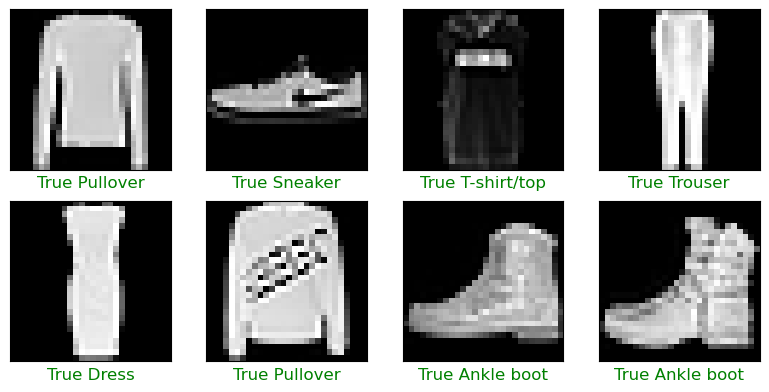

In [4]:
def plot_data(x_data: np.ndarray,y_data: np.ndarray) -> None:
    nrows, ncols = 2, 4
    fig, axes = plt.subplots(nrows,ncols, figsize=(8,4))
    
    len_x = x_data.shape[0]
    for idx in range(nrows*ncols):
        ax = axes[idx//ncols, idx % ncols]
        
        img_idx = random.randint(0,len_x)
        
        ax.imshow(x_data[img_idx],cmap='gray')
        ax.set(xticks=[],yticks=[])
        
        true_label_str = f"True {class_names[y_data[img_idx]]}"
        ax.set_xlabel(true_label_str, color='green', fontsize=12)
        
    plt.tight_layout()
    plt.show()

plot_data(x_train, y_train)
    

In [5]:
# Image Processing

In [6]:
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

In [7]:
x_train = np.expand_dims(x_train, axis=-1)

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
y_train_label.shape

(60000, 10)

In [9]:
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [10]:
y_train[0], y_train_label[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

In [15]:
# Neural Network 

In [16]:
input_shape = (28,28,1)

In [178]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=input_shape), #(28,28,1) -> (784)
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(class_nums, activation='softmax')
])

In [179]:
model.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics='accuracy')

In [180]:
epochs = 10
batch_size = 256
history = model.fit(x_train, y_train_label,
          epochs=epochs,
          batch_size=batch_size,
          validation_split=0.1,
         )

Epoch 1/10
211/211 [==============================] - 6s 21ms/step - loss: 0.6273 - accuracy: 0.7719 - val_loss: 0.5314 - val_accuracy: 0.7917
Epoch 2/10
211/211 [==============================] - 4s 19ms/step - loss: 0.4088 - accuracy: 0.8483 - val_loss: 0.4235 - val_accuracy: 0.8442
Epoch 3/10
211/211 [==============================] - 5s 24ms/step - loss: 0.3570 - accuracy: 0.8675 - val_loss: 0.3405 - val_accuracy: 0.8777
Epoch 4/10
211/211 [==============================] - 4s 21ms/step - loss: 0.3251 - accuracy: 0.8791 - val_loss: 0.3535 - val_accuracy: 0.8715
Epoch 5/10
211/211 [==============================] - 5s 25ms/step - loss: 0.2999 - accuracy: 0.8884 - val_loss: 0.3161 - val_accuracy: 0.8860
Epoch 6/10
211/211 [==============================] - 5s 23ms/step - loss: 0.2817 - accuracy: 0.8937 - val_loss: 0.3159 - val_accuracy: 0.8867
Epoch 7/10
211/211 [==============================] - 6s 28ms/step - loss: 0.2687 - accuracy: 0.8987 - val_loss: 0.3396 - val_accuracy: 0.8762

In [183]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [189]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_acc = history_dict['accuracy'],history_dict['val_accuracy']

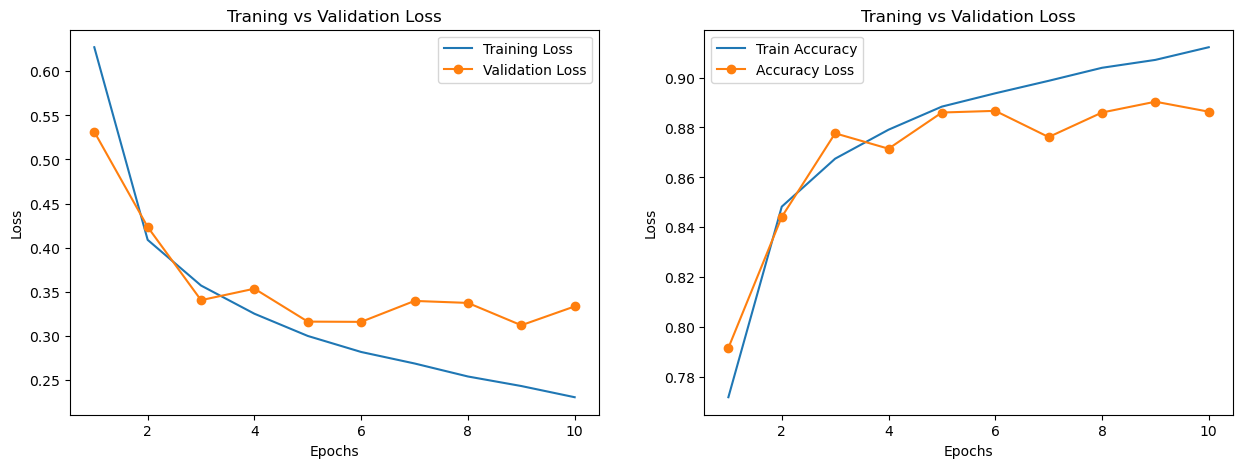

In [190]:
fig, (axi1, axi2) = plt.subplots(1,2, figsize=(15,5))
epoch_runs = [i+1 for i in range(epochs)]

axi1.plot(epoch_runs, train_loss, label ='Training Loss')
axi1.plot(epoch_runs, val_loss, label ='Validation Loss', marker='o')
axi1.set(title='Traning vs Validation Loss', xlabel = 'Epochs', ylabel = 'Loss')
axi1.legend()

axi2.plot(epoch_runs, train_acc, label ='Train Accuracy')
axi2.plot(epoch_runs, val_acc, label ='Accuracy Loss', marker='o')
axi2.set(title='Traning vs Validation Loss', xlabel = 'Epochs', ylabel = 'Loss')
axi2.legend()

plt.show()

In [197]:
# Evalution

In [191]:
score = model.evaluate(x_test,y_test_label)

313/313 [==============================] - 1s 4ms/step - loss: 0.3628 - accuracy: 0.8821


In [194]:
print(f"Test Accuracy: {score[1]:.4f}")
print(f"Test Loss: {score[0]:.4f}")

Test Accuracy: 0.8821
Test Loss: 0.3628


In [ ]:
# Prediction

In [198]:
x_sample = x_test[0:3]
y_proba = model.predict(x_sample)

1/1 [==============================] - 0s 131ms/step


In [206]:
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.003, 0.   ,
        0.996],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [208]:
predictions = np.argmax(y_proba, axis = 1)
predictions

array([9, 2, 1], dtype=int64)

In [210]:
[class_names[pre] for pre in predictions]

['Ankle boot', 'Pullover', 'Trouser']